Restauration des images
========

TP1 séance 2-3
========
--------
Ricardo

Safwane

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline 

 1) Développer un code qui permet d'appliquer un flou de bougé de l'image "lena.png" en fonction de la vitesse du bougé, de sa durée et de son orientation.

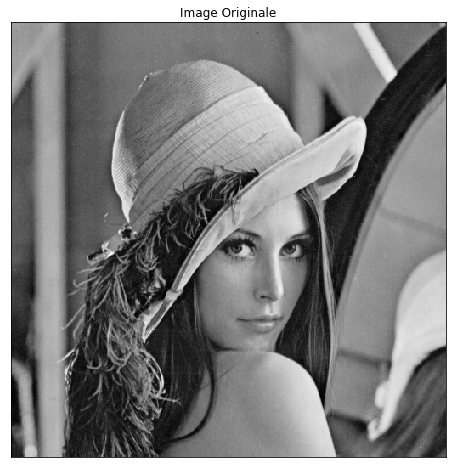

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('lena.png',0)  

(lignes, colonnes) = img.shape 

#Affichage de l'image originale
plt.figure(1,figsize=(8,8))
plt.imshow(img, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.title('Image Originale')
plt.show() 

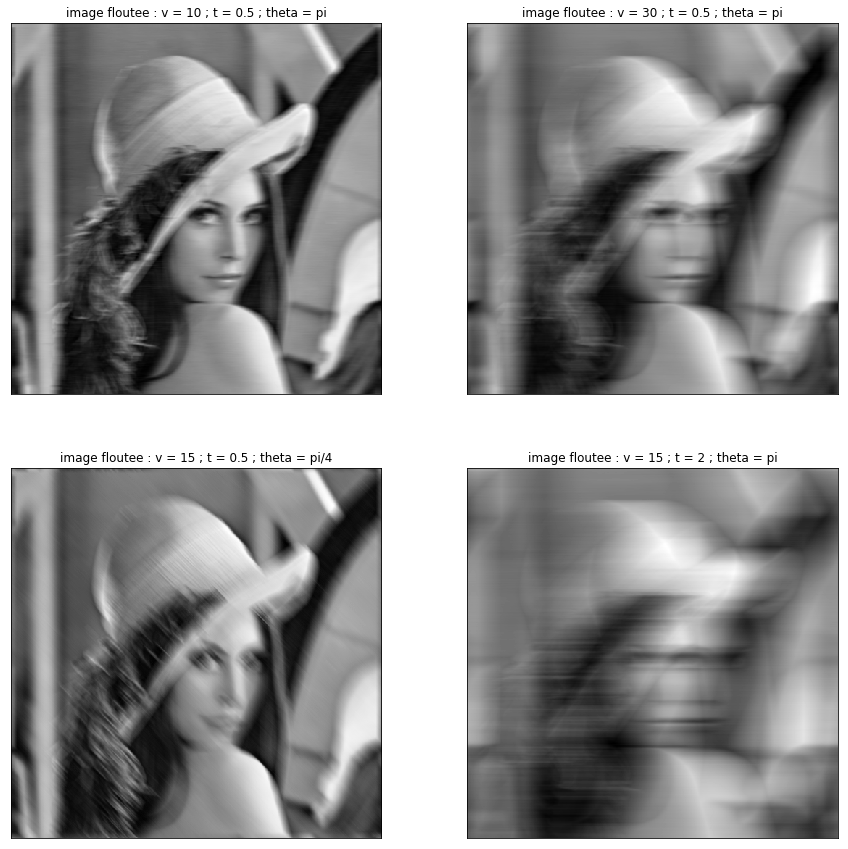

In [4]:
#Définition du filtre modélisant le flou de bougé
def filtre_flou(l, c, v, t, theta): # l:ligne ; c:colonne ; v:vitesse ; t:temps ; phi:angle
    L = v*t
    X=np.linspace(-l/2,l/2+1,l)/l
    Y=np.linspace(-c/2,c/2+1,c)/c
    [XX,YY]=np.meshgrid(X,Y)
    H = np.sinc(L*np.pi*((XX*np.cos(theta))+(YY*np.sin(theta))))
    return H



fft = np.fft.fft2(img)
fftshift = np.fft.fftshift(fft)

H1 = filtre_flou(lignes, colonnes, 10, 0.5, np.pi)
filtrage1 = H1*fftshift #Filtrage de l'image : multiplication du filtre par la fftshift de l'image en frequentiel

#Reconstruction de l'image avec flou de bougé dans le domaine spatiale avec la transformée inverse
imagefloutee1 = np.fft.ifft2(filtrage1)
imagefloutee1 = np.abs(imagefloutee1)



H2 = filtre_flou(lignes, colonnes, 30, 0.5, np.pi)
filtrage2 = H2*fftshift #Filtrage de l'image : multiplication du filtre par la fftshift de l'image en frequentiel

#Reconstruction de l'image avec flou de bougé dans le domaine spatiale avec la transformée inverse
imagefloutee2 = np.fft.ifft2(filtrage2) 
imagefloutee2 = np.abs(imagefloutee2)



H3 = filtre_flou(lignes, colonnes, 15, 0.5, np.pi/4)
filtrage3 = H3*fftshift #Filtrage de l'image : multiplication du filtre par la fftshift de l'image en frequentiel

#Reconstruction de l'image avec flou de bougé dans le domaine spatiale avec la transformée inverse
imagefloutee3 = np.fft.ifft2(filtrage3) 
imagefloutee3 = np.abs(imagefloutee3)



H4 = filtre_flou(lignes, colonnes, 15, 2, np.pi)
filtrage4 = H4*fftshift #Filtrage de l'image : multiplication du filtre par la fftshift de l'image en frequentiel

#Reconstruction de l'image avec flou de bougé dans le domaine spatiale avec la transformée inverse
imagefloutee4 = np.fft.ifft2(filtrage4) 
imagefloutee4 = np.abs(imagefloutee4)




#affichage des images avec flou de bougé
plt.figure(2,figsize = (15,15)) 

plt.subplot(221)
plt.imshow(imagefloutee1, cmap = 'gray')
plt.title('image floutee : v = 10 ; t = 0.5 ; theta = pi')
plt.xticks([]), plt.yticks([])


plt.subplot(222)
plt.imshow(imagefloutee2, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.title('image floutee : v = 30 ; t = 0.5 ; theta = pi')

plt.subplot(223)
plt.imshow(imagefloutee3, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.title('image floutee : v = 15 ; t = 0.5 ; theta = pi/4')

plt.subplot(224)
plt.imshow(imagefloutee4, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.title('image floutee : v = 15 ; t = 2 ; theta = pi')

plt.show()

Nous avons appliquer le filtre de bougé pour différents paramètres pour voir les effets. 
Quand v ou t augmente le flou est plus important
Quand on modifie theta l'orientation du flou est modifiée. En effet pour theta = pi/4 le flou est orientée selon une diagonale de l'image alors que pour theta = pi le flou est orientée selon l'axe horizontal

2) Proposer et programmer une méthode simple pour éliminer le flou de bougé
connu (tous les paramètres du flou sont connus).

Pour éliminer le flou de bougé on applique un filtre qui est égal à l'inverse du flou de bougé : G = 1/H

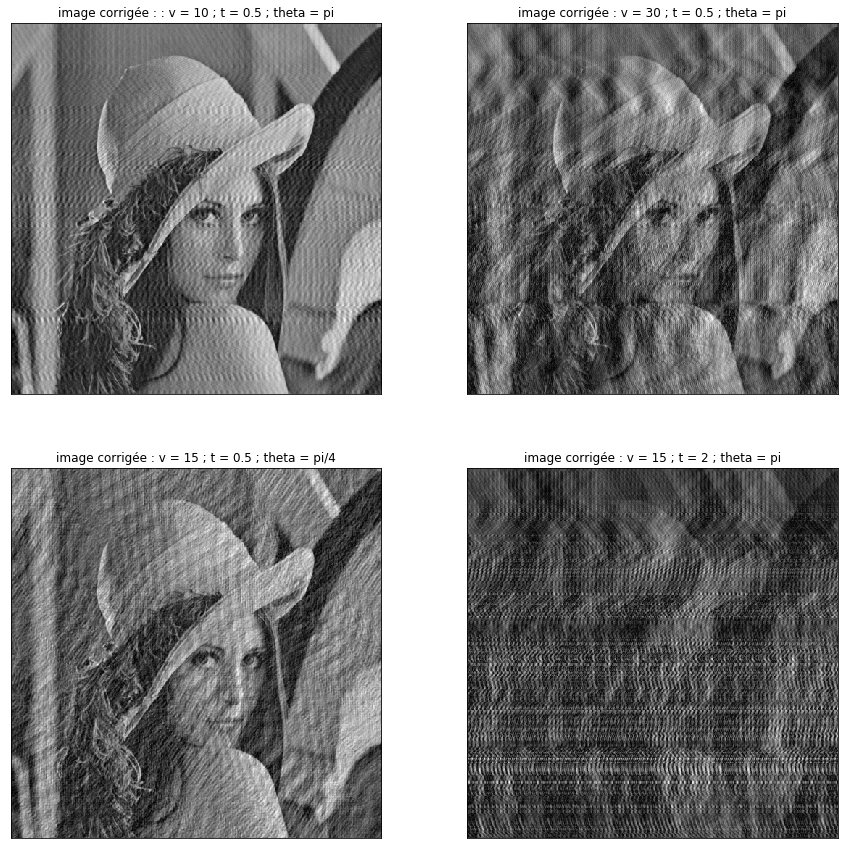

In [5]:
#On rectifie notre image en appliquant le filtre inverse
fft_imagefloutee1 = np.fft.fft2(imagefloutee1)
fft_shift_imagefloutee1 = np.fft.fftshift(fft_imagefloutee1)
G1 = 1/H1
#Filtrage de l'image avec flou de bougé : multiplication du filtre par la FFTshift de l'image en frequentiel
fft_corrige1 = G1 * fft_shift_imagefloutee1
#Reconstruction de l'image rectifiée dans le domaine spatial
image_corrige1 = np.fft.ifft2(fft_corrige1) 



#On rectifie notre image  en appliquant le filtre inverse
fft_imagefloutee2 = np.fft.fft2(imagefloutee2)
fft_shift_imagefloutee2 = np.fft.fftshift(fft_imagefloutee2)
G2 = 1/H2
#Filtrage de l'image avec flou de bougé : multiplication du filtre par la FFTshift de l'image en frequentiel
fft_corrige2 = G2 * fft_shift_imagefloutee2
#Reconstruction de l'image rectifiée dans le domaine spatial
image_corrige2 = np.fft.ifft2(fft_corrige2) 



#On rectifie notre image  en appliquant le filtre inverse
fft_imagefloutee3 = np.fft.fft2(imagefloutee3)
fft_shift_imagefloutee3 = np.fft.fftshift(fft_imagefloutee3)
G3 = 1/H3
#Filtrage de l'image avec flou de bougé : multiplication du filtre par la FFTshift de l'image en frequentiel
fft_corrige3 = G3 * fft_shift_imagefloutee3
#Reconstruction de l'image rectifiée dans le domaine spatial
image_corrige3 = np.fft.ifft2(fft_corrige3) 



#On rectifie notre image  en appliquant le filtre inverse
fft_imagefloutee4 = np.fft.fft2(imagefloutee4)
fft_shift_imagefloutee4 = np.fft.fftshift(fft_imagefloutee4)
G4 = 1/H4
#Filtrage de l'image avec flou de bougé : multiplication du filtre par la FFTshift de l'image en frequentiel
fft_corrige4 = G4 * fft_shift_imagefloutee4
#Reconstruction de l'image rectifiée dans le domaine spatial
image_corrige4 = np.fft.ifft2(fft_corrige4) 




#Affichage de l'image rectifiée
plt.figure(1,figsize=(15,15))
plt.subplot(221)
plt.imshow(np.abs(image_corrige1), cmap='gray'), plt.xticks([]), plt.yticks([])
plt.title('image corrigée : : v = 10 ; t = 0.5 ; theta = pi')

#Affichage de l'image rectifiée
plt.subplot(222)
plt.imshow(np.abs(image_corrige2), cmap='gray'), plt.xticks([]), plt.yticks([])
plt.title('image corrigée : v = 30 ; t = 0.5 ; theta = pi')

#Affichage de l'image rectifiée
plt.subplot(223)
plt.imshow(np.abs(image_corrige3), cmap='gray'), plt.xticks([]), plt.yticks([])
plt.title('image corrigée : v = 15 ; t = 0.5 ; theta = pi/4')

#Affichage de l'image rectifiée
plt.subplot(224)
plt.imshow(np.abs(image_corrige4), cmap='gray'), plt.xticks([]), plt.yticks([])
plt.title('image corrigée : v = 15 ; t = 2 ; theta = pi')

plt.show()

3)Cette méthode fonctionne-t-elle toujours efficacement? Évaluer l'efficacité de la méthode proposée en fonction des paramètres du flou.

La méthode n'est pas toujours efficace, en effet quand les paramètres v et t du flou sont élevés la reconstruction ne fonctionne pas bien. 

Pour les deux cas à gauche avec v = 10, t = 0.5 et v = 15, t = 0.5, on diminue le flou et on est capable de reconnaître quelques traits de la personne mais quand v et t sont trop grands on ne reconnaît plus rien.

4)Ajouter un bruit blanc à l'image avec le flou (typiquement un bruit Gaussien
de moyenne nulle et de variance connue). La méthode proposée est-elle
robuste au bruit ?


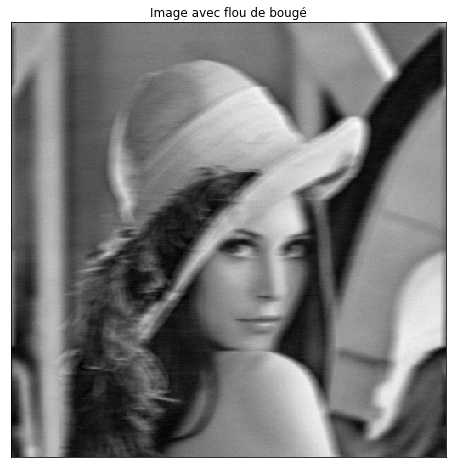

In [6]:
img_flou = cv2.imread('lenaflou.png',0)  

(ligne, colonne) = img_flou.shape 

#Affichage de l'image originale
plt.figure(1,figsize=(8,8))
plt.imshow(img_flou, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.title('Image avec flou de bougé')
plt.show() 



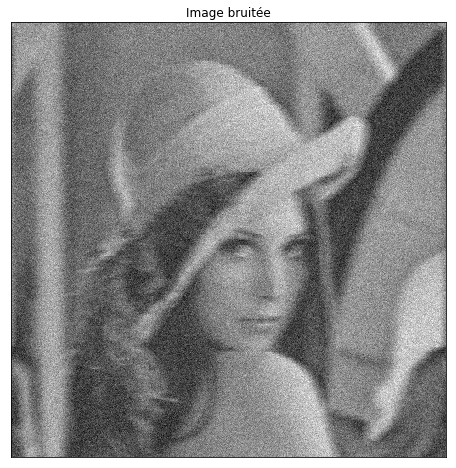

In [7]:
#Ajout de bruit sur l'image floue
bruit = np.random.normal(0,20,(ligne,colonne))
img_flou_bruitee = img_flou + bruit

#Affichage de l'image originale
plt.figure(1,figsize=(8,8))
plt.imshow(img_flou_bruitee, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.title('Image bruitée')
plt.show()

Text(0.5,1,'image corrigée : : v = 10 ; t = 0.5 ; theta = pi')

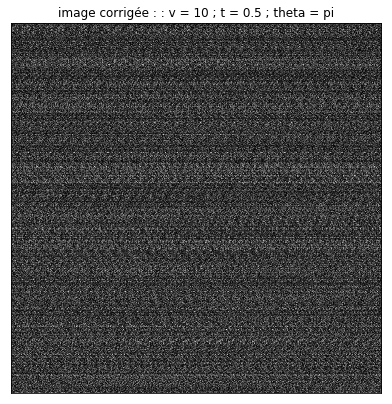

In [8]:
#On rectifie notre image en appliquant le filtre inverse
fft_img_flou_bruitee = np.fft.fft2(img_flou_bruitee)
fft_shift_img_flou_bruitee = np.fft.fftshift(fft_img_flou_bruitee)
G1 = 1/H1
#Filtrage de l'image avec flou de bougé : multiplication du filtre par la FFTshift de l'image en frequentiel
fft_corrige = G1 * fft_shift_img_flou_bruitee
#Reconstruction de l'image rectifiée dans le domaine spatial
image_corrige = np.fft.ifft2(fft_corrige)


#Affichage de l'image rectifiée
plt.figure(1,figsize=(15,15))
plt.subplot(221)
plt.imshow(np.abs(image_corrige), cmap='gray'), plt.xticks([]), plt.yticks([])
plt.title('image corrigée : : v = 10 ; t = 0.5 ; theta = pi')

5)Proposer une amélioration pour prendre en compte la présence du bruit.

6) En vous appuyant sur un formalisme mathématique soigné (et sur un
exercice de la séance 1), proposer une méthode simple pour estimer la
longueur L du bougé lorsque l'image avant le flou de bougé est inconnue. Les
autres paramètres du flou de bougé sont supposés connus.

Dans la séance 1 nous avions calculé le cepstre de la réponse impulsionnelle h du filtre. La formule du cepstre nous donne un moyen d'évaluer L. Démonstration :

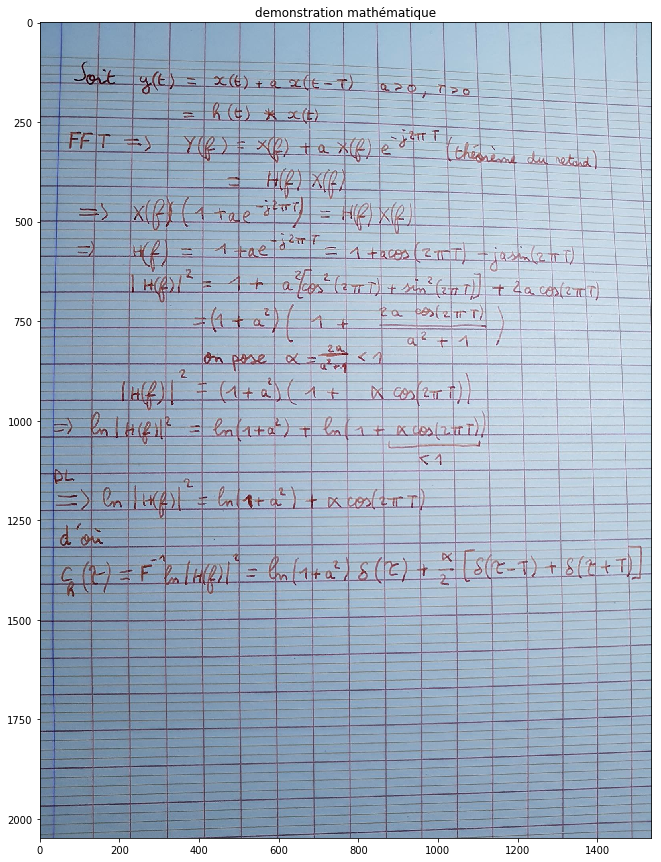

In [77]:
demonstration = cv2.imread('cepstre.jpg')

plt.figure(1,figsize=(15,15))

plt.imshow(demonstration, cmap='gray')
plt.title("démonstration mathématique")
plt.show()

D'après la formule établie on voit que l'on a 3 impulsions. Entre deux impulsions on trouve T qui dans notre cas correspond à L. Il nous faut donc déterminer les positions des impulsions, c'est l'objet de la question suivante.

7) Programmer la méthode d'estimation de la longueur L du flou de bougé.
Évaluer l'efficacité de cette méthode d'estimation (présence de bruit, valeur de
L, etc.).

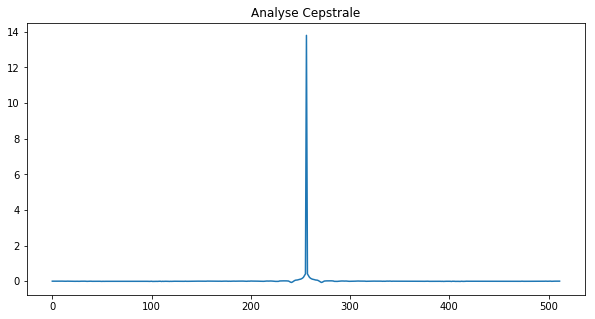

In [70]:
# Transformée de Fourier de l'image de Lena avec flou de bougé
fftlena_bouge=np.fft.fft2(img_flou)

# Calcul du CESPTRE
cepstre = np.log(np.abs(np.fft.fft2(img_flou))**2)
c=np.fft.ifft2(cepstre)
cepstre_inverse = np.fft.fftshift(c) #centré

# On ne prend que la partie réelle des composants du cepstre
cepstre_reel=np.real(cepstre_inverse)

Y=cepstre_reel[colonne//2]
X=np.arange(colonne)

plt.figure(1,figsize=(10,5))
plt.plot(X, Y)

plt.title('Cepstre')

plt.show()

On peut voir trois impulsions, il reste à déterminer la distance entre les impulsions en déterminant leurs positions. Il y a un maximum et un minimum au niveau de ces impulsions, on peut alors écrire une fonction minimum qui cherche la position du minimum et une fonction maximum qui cherche la position du maximum du cepstre.

In [75]:
def minimum(f):
    k=0
    k_min=0
    val_min=0
    while k<f.shape[0]-1:
        k=k+1
        if f[k]<val_min:
            k_min=k
            val_min=f[k]
    return k_min

def maximum(f):
    k=0
    k_max=0
    val_max=0
    while k<f.shape[0]-1:
        k=k+1
        if f[k]>val_max:
            k_max=k
            val_max=f[k]
    return k_max

valeur_max=maximum(Y)
valeur_min=minimum(Y)
L=value_max-value_min
print("L =",L)

L = 15
